# Example notebook for analysing and plotting the paper figures
### [OpenScope Credit Assignment repository](https://github.com/colleenjg/OpenScope_CA_Analysis)
### [Gillon _et al._, 2021, _bioRxiv_](https://www.biorxiv.org/content/10.1101/2021.01.15.426915v2)


---
### 1. Setup
To run this notebook, the conda environment with all the requisite packages, specified in `osca.yml` should already be installed, and the environment should be activated. If running this notebook in **Binder**, this is done automatically. The only remaining setup step required is to download the data from the Dandi archive.

#### Download data from the [Dandi archive](https://gui.dandiarchive.org/#/dandiset/000037)
Here, we will only download **session 1 data** (11 files) for all subjects, into a directory called `data`, which will be created inside the `OpenScope_CA_Analysis` directory.

Specifically, we **download the data** using `sess_util/sess_download_util.py`, which should be run from inside the directory. This will take a few minutes. 

**Note:** Files that have _already_ been fully downloaded will **not** be redownloaded.

In [1]:
print("Downloading data from Dandi (may take a few minutes)...\n")
%run sess_util/sess_download_util.py --sess_ns 1 --output data


Identifying the URLs of dandi assets to download...
PATH                                              SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-408021_ses-20180926T172917_behavior+ophys.nwb 238.0 MB 238.0 MB         100%    ok    done                   
Summary:                                          238.0 MB 238.0 MB                       1 done                 
                                                           100.00%                                               
PATH                                              SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-411771_ses-20181003T174857_behavior+ophys.nwb 230.3 MB 230.3 MB         100%    ok    done                   
Summary:                                          230.3 MB 230.3 MB                       1 done                 
                                                           100.00%                                               
PATH                               

---
## 2. Adjust a few settings in the notebook

In [2]:
# Set an environment variable that controls maximum memory use when performing permutation analyses.
# For Binder, we use a very low value, as memory resources are very limited (1-2 GB of RAM).
%env LIM_E6_SIZE=10

# Filter warnings related to (1) multiprocessing performance, (2) missing Arial font, and (3) running analyses in parallel.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="A worker stopped")
warnings.filterwarnings("ignore", category=UserWarning, message="Requested font")
warnings.filterwarnings("ignore", category=UserWarning, message="Unless memory demands")

# Set logging and warnings format.
from util import logger_util

env: LIM_E6_SIZE=10


---
## 3. Run paper analyses

All subsequent code should be run from inside the OpenScope_CA_Analysis repository.

We can now run some paper analyses and plot them.

We use the `run_paper_figures.py` script in the main directory of the OpenScope_CA_Analysis directory, with the following arguments:
- `datadir`: path to the downloaded data
- `output`: main directory in which to store the analysis data and plots
- `overwrite`: if included, existing analysis data and plots are overwritten
- `figure`: figure to plot (either `all` or a specific figure)
- `panel`: panel to plot (either `all` or a specific panel)
- `parallel`: if included, analyses are parallelized across available CPUs

#### **Notes on using Binder:** 
If running this notebook in Binder, the compute resources available are very limited.
- The analyses for most figure panels, other than the ones included in this notebook, are likely to **exceed the memory resources available** (1-2 GB, maximum).
- If an analysis suddenly fails, and the **kernel is restarted**, this is likely what has happened.
- For the panels that _are_ included in the notebook, it is best to run them sequentially, without the `--parallel` argument. 

In [3]:
# Uncomment the code below to see descriptions for all arguments
# %run run_paper_figures.py --help

### Fig. 1C



________________________________________________________________________________
Fig. 1C. Running analysis and producing plot: Example projections of 2p imaging planes.

- Minor manual formatting adjustments may be missing.

File will be overwritten.

Loading 4 session(s)...


100%|██████████| 4/4 [00:37<00:00,  9.35s/it]


Compiling imaging plane projection examples.


    Rasterizing imaging plane images...

Figures saved under paper_figures/Fig1.
Duration: 42.40s


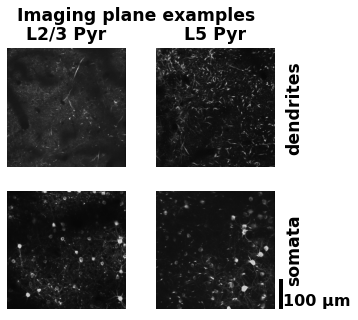

In [4]:
%run run_paper_figures.py --datadir data --output . --overwrite --figure 1 --panel C

### Fig. 2D, but with lower statistical power
Here, we run the analysis without the `--full_power` argument, in order to reduce compute time and memory demands. 

This means that, for this panel, fewer random permutations (here, `1e3` instead of `1e4`) are used in order to calculate each ROI's USI null distribution, and resulting significance percentile. The exact distribution plotted may therefore differ slightly from the one plotted in the paper, although they should be qualitatively the same.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`.



________________________________________________________________________________
Fig. 2D. Running analysis and producing plot: Example Gabor USI null distribution for a single ROI.

- Minor manual formatting adjustments may be missing.
- Reducing number of permutations/shuffles to reduce computation time. This weakens statistical power for significance testing a bit, potentially producing results that differ just slightly from published results. To reproduce paper results exactly, run script with the '--full_power' argument.

File will be overwritten.

Loading 1 session(s)...


100%|██████████| 1/1 [00:11<00:00, 11.45s/it]


Compiling Gabor ROI USIs, and identifying an example at or near the 99.8 percentile.



Figures saved under paper_figures/Fig2/panels_with_diff_params.
Duration: 21.09s


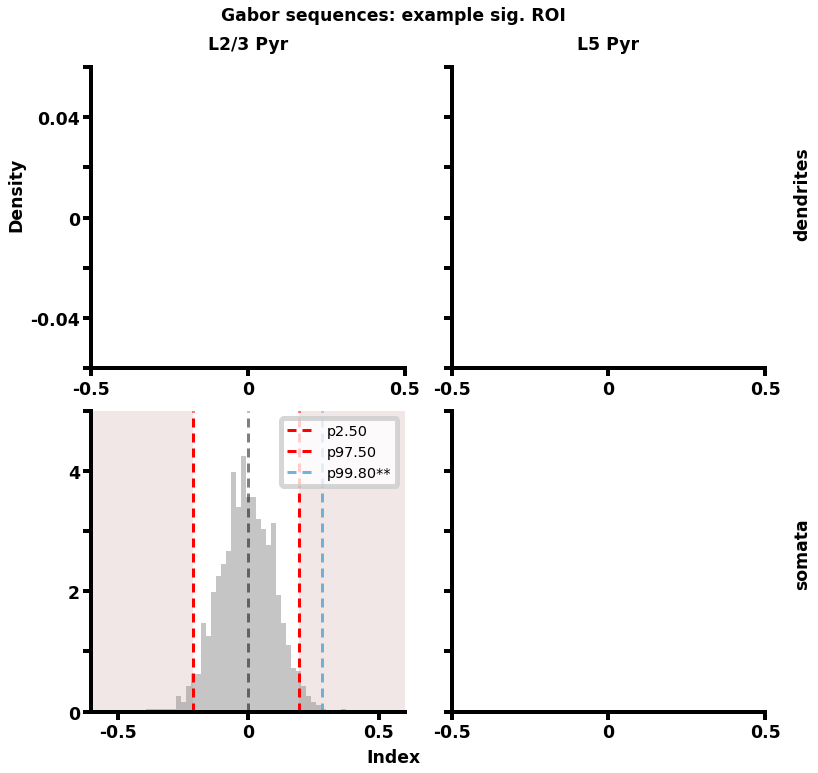

In [5]:
%run run_paper_figures.py --datadir data --output . --overwrite --figure 2 --panel D

### Fig. 3, with full statistical power
Here, we run the analyses with the `--full_power` argument, and thus should be able to exactly reproduce the p-values reported in the paper.



________________________________________________________________________________
Fig. 3A. Running analysis and producing plot: Running and pupil responses to Gabor sequences.

- Minor manual formatting adjustments may be missing.
- Running and pupil images will be missing.

File will be overwritten.

Loading 11 session(s)...


100%|██████████| 11/11 [03:13<00:00, 17.60s/it]


Compiling pupil and running sequences for session 1.



Figures saved under paper_figures/Fig3.
Duration: 3m 55.50s


Fig. 3B. Running analysis and producing plot: Trial differences in running and pupil responses U-G vs D-G Gabor sequences.

- Minor manual formatting adjustments may be missing.

File will be overwritten.

Compiling pupil and running block differences for session 1.

Raw p-values (two-tailed):
    Running velocity:    L2/3-D: 0.96460       L2/3-S: 0.27680       L5-D: 0.80780       L5-S: 0.44040   
    Pupil diameter  :    L2/3-D: 0.89240       L2/3-S: 0.19560       L5-D: 0.96880       L5-S: 0.26840   

Figures saved under paper_figures/Fig3.
Duration: 37.23s


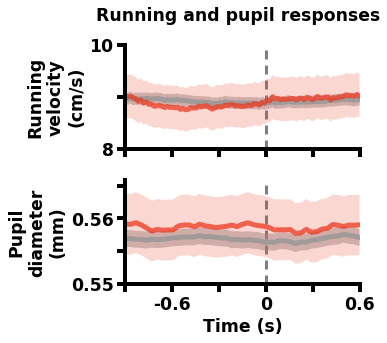

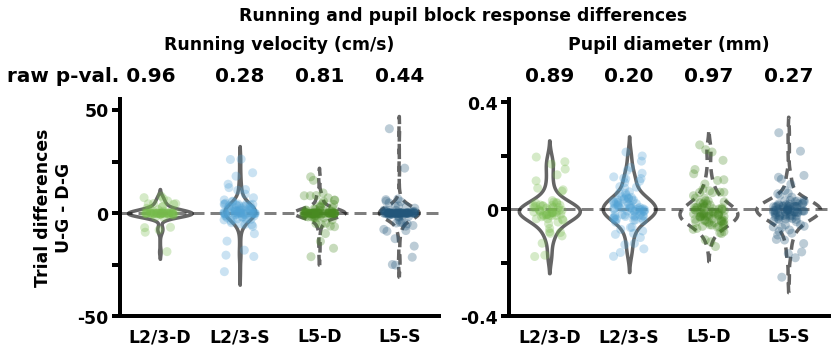

In [6]:
%run run_paper_figures.py --datadir data --output . --overwrite --figure 3 --panel all --full_power

### Fig. 3B, with a different random seed

By default, the script uses the same random process seed as was used for the paper. Here, however, we run the analysis with a different seed, i.e. `100`. This means that the exact p-values obtained may differ slightly from those reported in the paper, although they should be qualitatively the same.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`, with the seed number recorded in the file names.



________________________________________________________________________________
Fig. 3B. Running analysis and producing plot: Trial differences in running and pupil responses U-G vs D-G Gabor sequences.

- Minor manual formatting adjustments may be missing.
- Using a different seed from the one used in the paper: 100. Results may differ slightly from published results. To use paper seed, run script with default seed argument, i.e., '--seed paper'.

File will be overwritten.

Loading 11 session(s)...


100%|██████████| 11/11 [02:47<00:00, 15.20s/it]


Compiling pupil and running block differences for session 1.



Raw p-values (two-tailed):
    Running velocity:    L2/3-D: 0.98160       L2/3-S: 0.28240       L5-D: 0.79880       L5-S: 0.44160   
    Pupil diameter  :    L2/3-D: 0.92840       L2/3-S: 0.19920       L5-D: 0.97540       L5-S: 0.28180   

Figures saved under paper_figures/Fig3/panels_with_diff_params.
Duration: 3m 22.37s


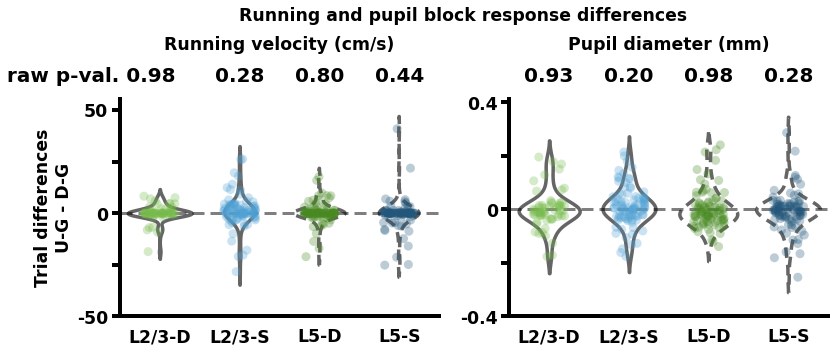

In [7]:
%run run_paper_figures.py --datadir data --output . --overwrite --figure 3 --panel B --full_power --seed 100

---
# 4. Final Notes

For most other figures and panels, the remaining sessions **(sessions 2 and 3)** must also be downloaded. This can be done by returning to **Step 1d**, and rerunning the download with the argument `--sess_ns 1-3`.

The analyses for some panels are **computationally expensive** (generally, those that involve numerous statistical significance comparisons, e.g. Fig. 4B) or **long** (decoder analyses for Fig. 5A-B), and are best run on a **high-compute device**.